### Image classification using CNN

Dataset: CIFAR-10 dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train,), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
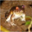

In [3]:
X_train[0]

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Converting the 2D shape of y_train to 1D

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
classes[9]

'truck'

In [8]:
def plt_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

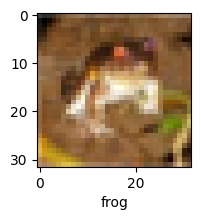

In [9]:
plt_sample(X_train, y_train, 0)

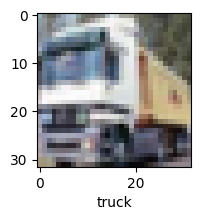

In [10]:
plt_sample(X_train, y_train, 1)

### Normalize our data:

Since the image value are in the range between 0 and 255.
 By dividing the image by 255, we get the value to be between 0 and 1.

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.3027 - loss: 1.9338
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 77ms/step - accuracy: 0.4187 - loss: 1.6463
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.4473 - loss: 1.5635
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4747 - loss: 1.4913
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - accuracy: 0.4911 - loss: 1.4393


In [13]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4676 - loss: 1.4756


[1.4845075607299805, 0.46149998903274536]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.46      0.51      1000
           1       0.69      0.49      0.57      1000
           2       0.39      0.28      0.33      1000
           3       0.38      0.17      0.24      1000
           4       0.50      0.21      0.29      1000
           5       0.34      0.48      0.40      1000
           6       0.41      0.71      0.52      1000
           7       0.72      0.35      0.47      1000
           8       0.46      0.78      0.58      1000
           9       0.43      0.69      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



In [15]:
cnn = models.Sequential([
      # cnn
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),

      # dense
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3812 - loss: 1.6988
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5992 - loss: 1.1327
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6557 - loss: 0.9870
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6929 - loss: 0.8867
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.7165 - loss: 0.8169
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.7352 - loss: 0.7564
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7589 - loss: 0.6891
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7734 - loss: 0.6486
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7901 - loss: 0.6048
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7975 - loss: 0.5735


In [18]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6957 - loss: 0.9088


[0.9217798709869385, 0.6959999799728394]

In [19]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

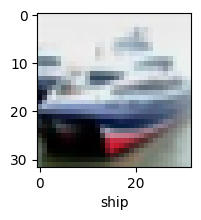

In [21]:
y_test = y_test.reshape(-1,)
plt_sample(X_test, y_test, 1)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[7.1034866e-04, 2.0292410e-04, 6.8156701e-04, 7.7110529e-01,
        9.6977985e-04, 6.7056660e-03, 4.6007268e-02, 2.2808679e-05,
        1.7277713e-01, 8.1723329e-04],
       [8.6633330e-03, 2.0661432e-02, 4.1639098e-05, 2.0613740e-08,
        4.0347356e-08, 1.9791257e-11, 9.1586925e-09, 5.6720747e-08,
        9.7055185e-01, 8.1535974e-05],
       [4.3095365e-02, 8.2707822e-02, 1.2856746e-03, 2.0449969e-03,
        3.9788630e-04, 2.7603088e-05, 2.3616536e-04, 2.5509932e-04,
        8.2282275e-01, 4.7126640e-02],
       [6.5496284e-01, 3.9370090e-02, 1.5945021e-02, 8.6970907e-04,
        2.4168193e-03, 1.6238861e-06, 1.2884578e-05, 6.6031155e-04,
        2.8467137e-01, 1.0892358e-03],
       [2.3633481e-07, 3.0810588e-07, 1.7026823e-02, 5.3756461e-03,
        5.1092017e-02, 3.0689753e-04, 9.2619771e-01, 2.9479782e-08,
        3.5540504e-07, 1.1792142e-08]], dtype=float32)

In [23]:
np.argmax(y_pred[0])

np.int64(3)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

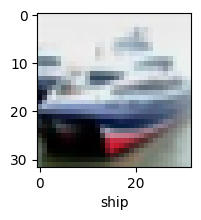

In [27]:
# actual value
plt_sample(X_test, y_test, 1)

In [28]:
# Predicted value
classes[y_classes[1]]

'ship'

In [29]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.74      0.89      0.81      1000
           2       0.58      0.62      0.60      1000
           3       0.49      0.55      0.52      1000
           4       0.75      0.55      0.64      1000
           5       0.68      0.56      0.62      1000
           6       0.71      0.79      0.75      1000
           7       0.79      0.72      0.75      1000
           8       0.72      0.86      0.78      1000
           9       0.81      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

